# Import Library

In [1]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

### Import Images

In [2]:
path1 = 'input/23n88.png'
path2 = 'input/23mdg.png'

In [3]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')
    
    plt.axis('off')
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

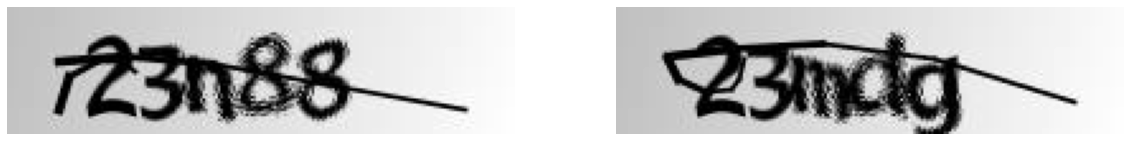

In [4]:
plot_(img1, img2)

# Image Preprocessing

### Adaptive Thresholding
Thresholding adalah suatu metode yang digunakan untuk memisahkan antara obyek dan backgroundnya. Tujuannya adalah agar citra menjadi citra biner yang hanya memiliki dua warna pixel yaitu hitam dan putih.

In [5]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

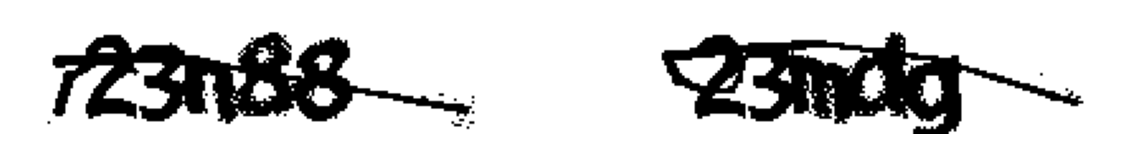

In [6]:
plot_(thresh_img1, thresh_img2)

### Closing
Closing digunakan untuk menghaluskan kontur gambar yang terdistorsi dan menyatukan kembali celah sempit dan jurang tipis yang panjang. Closing juga digunakan untuk menghilangkan lubang-lubang kecil pada citra yang diperoleh.

In [7]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

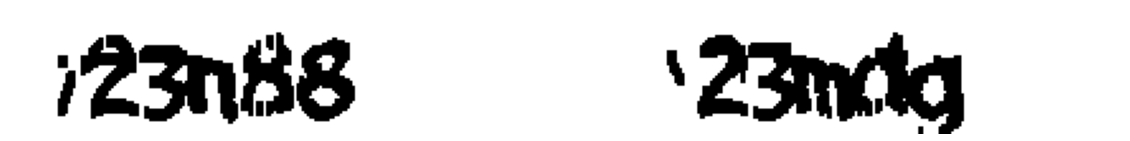

In [8]:
plot_(close_img1, close_img2)

### Dilation
Dilasi menambahkan piksel ke batas objek dalam gambar. Hal ini menyebabkan wilayah putih melebar pada gambar.

In [9]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

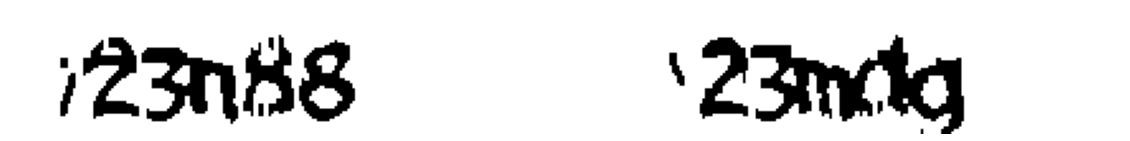

In [10]:
plot_(dilate_img1, dilate_img2)

### Smoothing Images (Blurring)
Bertujuan untuk menghilangkan komponen frekuensi tinggi yaitu noise dan edge dari gambar.

In [11]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

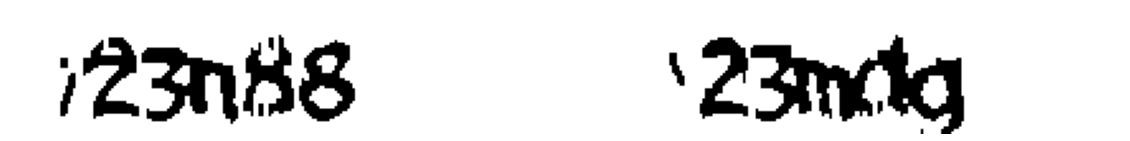

In [12]:
plot_(gauss_img1, gauss_img2)

### PartitioningBatchNormalization

In [13]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

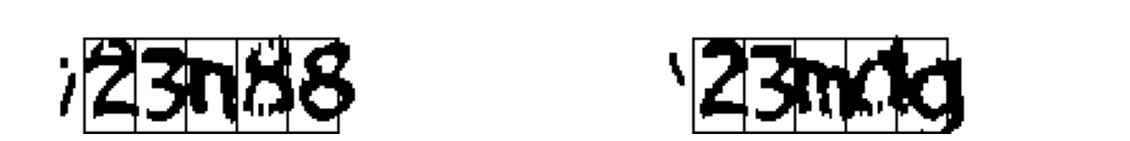

In [14]:
plot_(gauss_img1, gauss_img2)